In [48]:
##Linear regression by using Deep Neural network: Implement Boston housing price prediction problem by Linear regression
##using Deep Neural network. Use Boston House price prediction dataset

In [50]:
## step 1: Import the libraries
import pandas as pd
!pip install keras
# Load the dataset from a CSV file
df = pd.read_csv('C://Users//Owner//Desktop//Deep Learning//Deep Learning_Practical//Dataset//Boston_house_Pricing_data.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [51]:
##CRIM - per capita crime rate by town
##ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
##INDUS - proportion of non-retail business acres per town.
##CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
##NOX - nitric oxides concentration (parts per 10 million)
##RM - average number of rooms per dwelling
##AGE - proportion of owner-occupied units built prior to 1940
##DIS - weighted distances to five Boston employment centres
##RAD - index of accessibility to radial highways
##TAX - full-value property-tax rate per $10,000
##PTRATIO - pupil-teacher ratio by town
##B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
##LSTAT - % lower status of the population
##MEDV - Median value of owner-occupied homes in $1000's


In [52]:
##Step 2: Preprocess the data
from sklearn.preprocessing import StandardScaler
# Split the data into input and output variables
X = df.drop('MEDV', axis=1)
y = df['MEDV']
# Scale the input features
scaler = StandardScaler() 
X = scaler.fit_transform(X)


In [53]:
####Step 3:Display the first few rows of the scaled input features
scaler = StandardScaler() 
X = scaler.fit_transform(X)
print(X[:5])


[[-0.41978194  0.28482986 -1.2879095  -0.27259857 -0.14421743  0.40686348
  -0.12001342  0.1402136  -0.98284286 -0.66660821 -1.45900038  0.44105193
  -1.0755623 ]
 [-0.41733926 -0.48772236 -0.59338101 -0.27259857 -0.74026221  0.18805801
   0.36716642  0.55715988 -0.8678825  -0.98732948 -0.30309415  0.44105193
  -0.49243937]
 [-0.41734159 -0.48772236 -0.59338101 -0.27259857 -0.74026221  1.27356045
  -0.26581176  0.55715988 -0.8678825  -0.98732948 -0.30309415  0.39642699
  -1.2087274 ]
 [-0.41675042 -0.48772236 -1.30687771 -0.27259857 -0.83528384  1.0078681
  -0.80988851  1.07773662 -0.75292215 -1.10611514  0.1130321   0.41616284
  -1.36151682]
 [-0.41248185 -0.48772236 -1.30687771 -0.27259857 -0.83528384  1.2195695
  -0.51117971  1.07773662 -0.75292215 -1.10611514  0.1130321   0.44105193
  -1.02650148]]


In [54]:
##Step 4: Split the dataset
from sklearn.model_selection import train_test_split # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Print the shapes of the training and testing sets
print('Training set shape:', X_train.shape, y_train.shape)
print('Testing set shape:', X_test.shape, y_test.shape)

Training set shape: (354, 13) (354,)
Testing set shape: (152, 13) (152,)


In [55]:
##Step 5: Define the model architecture 
from keras.models import Sequential
from keras.layers import Dense, Dropout
# Define the model architecture
model =Sequential()
model.add(Dense(64, input_dim=13, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
#model.add(Dense(32, activation='relu'))
model.add(Dense(1))
# Display the model summary
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 64)                896       
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 32)                2080      
                                                                 
 dense_12 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3009 (11.75 KB)
Trainable params: 3009 (11.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [56]:
##Step 6: Compile the model
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

In [57]:
##Step 7: Train the model
from keras.callbacks import EarlyStopping
# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32,callbacks=[early_stopping])


Epoch 1/100
9/9 [==============================] - 1s 23ms/step - loss: 626.3045 - mean_absolute_error: 23.1168 - val_loss: 585.0894 - val_mean_absolute_error: 22.7031
Epoch 2/100
9/9 [==============================] - 0s 7ms/step - loss: 622.4672 - mean_absolute_error: 23.0224 - val_loss: 583.0551 - val_mean_absolute_error: 22.6583
Epoch 3/100
9/9 [==============================] - 0s 8ms/step - loss: 620.3851 - mean_absolute_error: 22.9767 - val_loss: 580.9435 - val_mean_absolute_error: 22.6116
Epoch 4/100
9/9 [==============================] - 0s 8ms/step - loss: 618.2057 - mean_absolute_error: 22.9296 - val_loss: 578.7842 - val_mean_absolute_error: 22.5638
Epoch 5/100
9/9 [==============================] - 0s 7ms/step - loss: 616.0076 - mean_absolute_error: 22.8808 - val_loss: 576.5265 - val_mean_absolute_error: 22.5138
Epoch 6/100
9/9 [==============================] - 0s 7ms/step - loss: 613.6426 - mean_absolute_error: 22.8300 - val_loss: 574.1867 - val_mean_absolute_error: 22.46

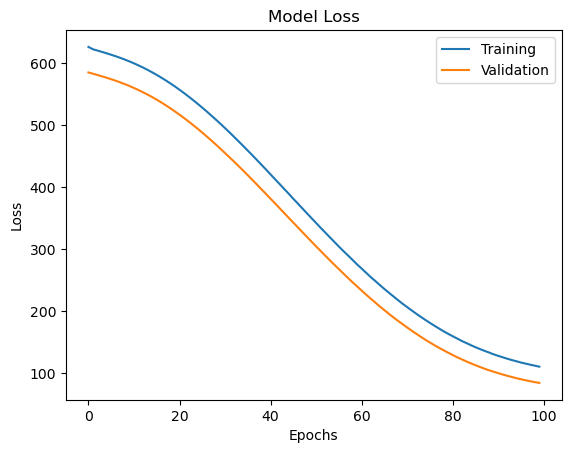

In [58]:
#Step 8: Plot the training and validation loss over epochs 
import matplotlib.pyplot as plt 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training','Validation'])
plt.show()

In [59]:
#Step 9: Evaluate the model
# Evaluate the model on the testing set 
loss,mae = model.evaluate(X_test, y_test)
# Print the mean absolute error
print('Mean Absolute Error:', mae)

5/5 [==============================] - 0s 4ms/step - loss: 80.6801 - mean_absolute_error: 6.0504
Mean Absolute Error: 6.050418376922607
